## 텐서, 노드, 넘파이 관계

> 노드: 그래프를 이루고 있는 동그라미들
> 텐서:
- 데이터 객체
- = 을 사용해서 만드는 애들(by teacher)
(constante, variable, operator)
- 노드가 표현해줄수 있는 데이터의 범위(by하늘)

> 넘파이: 실제로 데이터를 담는 데이터  자료형

In [118]:
import tensorflow as tf

In [119]:
tf.__version__


'1.14.0'

# tensorflow Mechnics

1.Build graph using TF operations

2.Run graph and get results

3.Update graph and get results


## Ex1. Variable 사용

> x, y 값이 주어졌을 때, W, b 값을 예측하기

그래프 빌드
세션을 통해 그래프를 실행
실행결과가 그래프를 업데이트

In [ ]:
from tqdm import tqdm_notebook
import tensorflow as tf

In [ ]:
# 데이터 준비
x_train = [1,2,3]
y_train = [1,2,3]

W = tf.Variable(tf.random_normal([1]), name = 'weight')  #.RefVariable의 객체
b = tf.Variable(tf.random_normal([1]), name = 'bias')  # Variable 메소드를 사용해서 만든 객체

In [123]:
print(W, type(W))
print(b, type(b))

<tf.Variable 'weight_7:0' shape=(1,) dtype=float32_ref> <class 'tensorflow.python.ops.variables.RefVariable'>
<tf.Variable 'bias_7:0' shape=(1,) dtype=float32_ref> <class 'tensorflow.python.ops.variables.RefVariable'>


In [122]:
dir(tf)  

['AUTO_REUSE',
 'AggregationMethod',
 'Assert',
 'AttrValue',
 'COMPILER_VERSION',
 'CXX11_ABI_FLAG',
 'ConditionalAccumulator',
 'ConditionalAccumulatorBase',
 'ConfigProto',
 'CriticalSection',
 'DType',
 'DeviceSpec',
 'Dimension',
 'Event',
 'FIFOQueue',
 'FixedLenFeature',
 'FixedLenSequenceFeature',
 'FixedLengthRecordReader',
 'GIT_VERSION',
 'GPUOptions',
 'GRAPH_DEF_VERSION',
 'GRAPH_DEF_VERSION_MIN_CONSUMER',
 'GRAPH_DEF_VERSION_MIN_PRODUCER',
 'GradientTape',
 'Graph',
 'GraphDef',
 'GraphKeys',
 'GraphOptions',
 'HistogramProto',
 'IdentityReader',
 'IndexedSlices',
 'InteractiveSession',
 'LMDBReader',
 'LogMessage',
 'MONOLITHIC_BUILD',
 'MetaGraphDef',
 'Module',
 'NameAttrList',
 'NoGradient',
 'NodeDef',
 'NotDifferentiable',
 'OpError',
 'Operation',
 'OptimizerOptions',
 'PaddingFIFOQueue',
 'Print',
 'PriorityQueue',
 'QUANTIZED_DTYPES',
 'QueueBase',
 'RaggedTensor',
 'RandomShuffleQueue',
 'ReaderBase',
 'RegisterGradient',
 'RunMetadata',
 'RunOptions',
 'Session

In [124]:
# 모델 만들기
hypothesis = x_train * W + b  # 텐서 (=으로도 만들 수 있음) -> 텐서플로우 framework

In [126]:
print(hypothesis, type(hypothesis))

Tensor("add_19:0", shape=(3,), dtype=float32) <class 'tensorflow.python.framework.ops.Tensor'>


In [129]:
# 비용, cost
cost = tf.reduce_mean(tf.square(hypothesis - y_train))  # tf.reduce_mean 메서드로 만든 인스턴스변수?

In [130]:
print(cost, type(cost))

Tensor("Mean_9:0", shape=(), dtype=float32) <class 'tensorflow.python.framework.ops.Tensor'>


In [ ]:
# 변수값 적게-> 최적화
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)  # 인스턴스
# 트레인 노드 만들기
train = optimizer.minimize(cost)  # 메소드 실행

In [131]:
print(optimizer, type(optimizer))  # 인스턴스

<tensorflow.python.training.gradient_descent.GradientDescentOptimizer object at 0x0000024AE6563AC8> <class 'tensorflow.python.training.gradient_descent.GradientDescentOptimizer'>


In [134]:
sess = tf.Session()

sess.run(tf.global_variables_initializer())

In [135]:
# Fit the line
for step in tqdm_notebook(range(2001)):
    sess.run(train)
    if step % 200 == 0 or step < 5:
        # print(step, cost_val, W_val, b_val)
        print("step={step}, \t cost={cost_val},  \t W={W_val},  \t b={b_val}".format(
            step=step, 
            cost_val=sess.run(cost), 
            W_val=sess.run(W), 
            b_val=sess.run(b)
        ));

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_7' with dtype float and shape [?]
	 [[node Placeholder_7 (defined at <ipython-input-99-2d9d641d501b>:7) ]]

Original stack trace for 'Placeholder_7':
  File "C:\Python\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Python\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Python\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Python\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "C:\Python\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "C:\Python\Anaconda3\lib\asyncio\base_events.py", line 539, in run_forever
    self._run_once()
  File "C:\Python\Anaconda3\lib\asyncio\base_events.py", line 1775, in _run_once
    handle._run()
  File "C:\Python\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Python\Anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Python\Anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Python\Anaconda3\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "C:\Python\Anaconda3\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\Python\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Python\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Python\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 272, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Python\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Python\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 542, in execute_request
    user_expressions, allow_stdin,
  File "C:\Python\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Python\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Python\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Python\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2854, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Python\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2880, in _run_cell
    return runner(coro)
  File "C:\Python\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Python\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3057, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Python\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3248, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Python\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-99-2d9d641d501b>", line 7, in <module>
    Y = tf.placeholder(tf.float32, shape=[None])
  File "C:\Python\Anaconda3\lib\site-packages\tensorflow\python\ops\array_ops.py", line 2143, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\Python\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 6261, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "C:\Python\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "C:\Python\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\Python\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3616, in create_op
    op_def=op_def)
  File "C:\Python\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()


In [110]:
dir(optimizer)

['GATE_GRAPH',
 'GATE_NONE',
 'GATE_OP',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_variable_with_custom_getter',
 '_apply_dense',
 '_apply_sparse',
 '_apply_sparse_duplicate_indices',
 '_assert_valid_dtypes',
 '_call_if_callable',
 '_checkpoint_dependencies',
 '_create_non_slot_variable',
 '_create_or_restore_slot_variable',
 '_create_slots',
 '_deferred_dependencies',
 '_deferred_slot_restorations',
 '_distributed_apply',
 '_finish',
 '_gather_saveables_for_checkpoint',
 '_get_non_slot_variable',
 '_get_or_make_slot',
 '_get_or_make_slot_with_initializer',
 '_handle_deferred_dependencies',
 '_learning_rate',
 '_learning_rate_tensor',
 '_list_functions_for_

In [112]:
type(W) 

tensorflow.python.ops.variables.RefVariable

In [ ]:
print(optimizer, type(optimizer)) 

In [115]:
print(train)

name: "GradientDescent_5"
op: "NoOp"
input: "^GradientDescent_5/update_weight_7/ApplyGradientDescent"
input: "^GradientDescent_5/update_bias_7/ApplyGradientDescent"



In [117]:
 type(train) # opersaion

tensorflow.python.framework.ops.Operation

In [109]:
print(type, type(cost))  # 텐서

<tensorflow.python.training.gradient_descent.GradientDescentOptimizer object at 0x0000024AE6563AC8> <class 'tensorflow.python.training.gradient_descent.GradientDescentOptimizer'>
name: "GradientDescent_5"
op: "NoOp"
input: "^GradientDescent_5/update_weight_7/ApplyGradientDescent"
input: "^GradientDescent_5/update_bias_7/ApplyGradientDescent"
 <class 'tensorflow.python.framework.ops.Operation'>
<class 'type'> <class 'tensorflow.python.framework.ops.Tensor'>


## Ex2.Placeholder 사용

> 데이터 형태만 지정하고 실제 데이터는 실행 단계에서 입력 받는 방법
- 그래프 빌드
- 세션을 통해 그래프 실행
- 실행 결과가 그래프를 업데이트

In [99]:
import tensorflow as tf

W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32, shape=[None])

# Our hypothesis XW+b
hypothesis = X * W + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
# sess.run(tf.initialize_all_variables())
sess.run(tf.global_variables_initializer())

In [102]:
# fit the line
steps = []
cost_vals = []
W_vals = []
b_vals = []

for step in tqdm_notebook(range(2001)):
    cost_val, W_val, b_val, _ = sess.run([cost, W, b, train],
                                         feed_dict={X: [1, 2, 3], 
                                                    Y: [1, 2, 3]})
    steps.append(step)
    cost_vals.append(cost_val)
    W_vals.append(W_val)
    b_vals.append(b_val)
    # W_vals.append(float(W_val))
    # b_vals.append(float(b_val))
    
    if step % 200 == 0 or step < 5:
        # print(step, cost_val, W_val, b_val)
        print("step={step}, \t cost={cost_val}, \t W={W_val}, \t b={b_val}".format(
            step=step, cost_val=cost_val, W_val=W_val, b_val=b_val
            ));

step=0, 	 cost=0.31043195724487305, 	 W=[0.6741492], 	 b=[1.1066383]
step=1, 	 cost=0.27775323390960693, 	 W=[0.66029644], 	 b=[1.0975395]
step=2, 	 cost=0.25176700949668884, 	 W=[0.64810055], 	 b=[1.0891769]
step=3, 	 cost=0.23107169568538666, 	 W=[0.63737744], 	 b=[1.0814693]
step=4, 	 cost=0.21455909311771393, 	 W=[0.6279634], 	 b=[1.0743449]
step=200, 	 cost=0.0603744275867939, 	 W=[0.7153067], 	 b=[0.64717484]
step=400, 	 cost=0.023053912445902824, 	 W=[0.82407683], 	 b=[0.39991465]
step=600, 	 cost=0.008803118951618671, 	 W=[0.89129025], 	 b=[0.24712291]
step=800, 	 cost=0.0033614598214626312, 	 W=[0.9328239], 	 b=[0.15270701]
step=1000, 	 cost=0.0012835749657824636, 	 W=[0.9584892], 	 b=[0.09436373]
step=1200, 	 cost=0.0004901292268186808, 	 W=[0.97434884], 	 b=[0.05831107]
step=1400, 	 cost=0.0001871560380095616, 	 W=[0.98414916], 	 b=[0.03603274]
step=1600, 	 cost=7.146428833948448e-05, 	 W=[0.9902053], 	 b=[0.02226595]
step=1800, 	 cost=2.7287960620014928e-05, 	 W=[0.99394745

In [103]:
W_val, W_val[0], type(W_val[0])

(array([0.9962598], dtype=float32), 0.9962598, numpy.float32)

In [104]:
type(b_val), str(b_val), float(b_val)

(numpy.ndarray, '[0.00850227]', 0.008502267301082611)

## Ex3. placeholder 사용

In [113]:
# Fit the line
# for step in notebook_tqdm(range(2001)):
for step in range(2001):

    cost_val, W_val, b_val, _ = sess.run([cost, W, b, train],
        feed_dict={X: [1.0, 2.0, 3.0, 4.0, 5.0], 
                   Y: [2.1, 3.1, 4.1, 5.1, 6.1]})
    if step % 100 == 0 or step < 10:
        # print(step, cost_val, W_val, b_val)
        print("step={step}, \t cost={cost_val}, \t W={W_val},  \t b={b_val}".format(
            step=step, cost_val=cost_val, W_val=W_val, b_val=b_val
            ));
        

step=0, 	 cost=1.216015338897705, 	 W=[1.0625725],  	 b=[0.03055663]
step=1, 	 cost=0.7852710485458374, 	 W=[1.1129731],  	 b=[0.04819115]
step=2, 	 cost=0.533737301826477, 	 W=[1.1512276],  	 b=[0.06244893]
step=3, 	 cost=0.38664156198501587, 	 W=[1.1802106],  	 b=[0.0741263]
step=4, 	 cost=0.3004114031791687, 	 W=[1.2021167],  	 b=[0.08383113]
step=5, 	 cost=0.2496536523103714, 	 W=[1.2186211],  	 b=[0.0920275]
step=6, 	 cost=0.21957115828990936, 	 W=[1.2310028],  	 b=[0.09906968]
step=7, 	 cost=0.20154044032096863, 	 W=[1.240238],  	 b=[0.10522811]
step=8, 	 cost=0.1905362904071808, 	 W=[1.2470719],  	 b=[0.11070927]
step=9, 	 cost=0.18363021314144135, 	 W=[1.2520735],  	 b=[0.11567078]
step=100, 	 cost=0.09483404457569122, 	 W=[1.1992551],  	 b=[0.38062605]
step=200, 	 cost=0.04817254841327667, 	 W=[1.1420127],  	 b=[0.58728886]
step=300, 	 cost=0.024470146745443344, 	 W=[1.1012151],  	 b=[0.73458123]
step=400, 	 cost=0.012430008500814438, 	 W=[1.0721377],  	 b=[0.83955956]
step=50

# Ex4. Linear Regression

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

number_of_points = 200
x_point = []
y_point = []

w = 0.25
b = 0.75

for i in range(number_of_points):
    x = np.random.normal(0.0, 0.5)
    y = w*x + b +np.random.normal(0.0, 0.1)
    x_point.append([x])
    y_point.append([y])

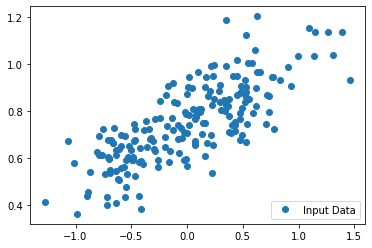

In [142]:
plt.plot(x_point,y_point, 'o', label='Input Data')
plt.legend(loc=4)
plt.show()

In [143]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
B = tf.Variable(tf.zeros([1]))
y = W * x_point + B

In [144]:
cost_function = tf.reduce_mean(tf.square(y-y_point))

In [146]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)



In [147]:
train = optimizer.minimize(cost_function)


In [148]:
model = tf.global_variables_initializer()



 y = [0.30362788] x + [0.748709] 


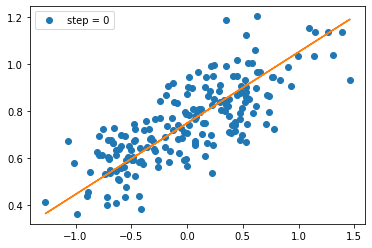


 y = [0.2859953] x + [0.748848] 


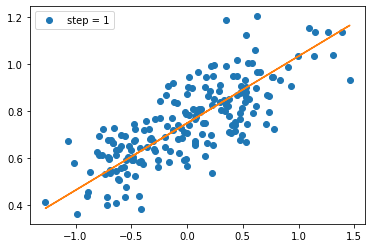


 y = [0.2734786] x + [0.74900895] 


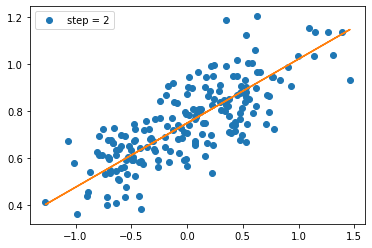


 y = [0.2645929] x + [0.7491232] 


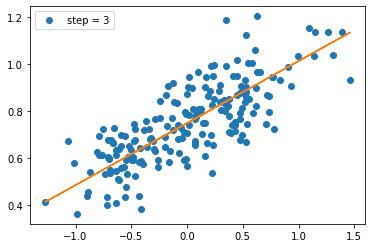


 y = [0.25828484] x + [0.74920434] 


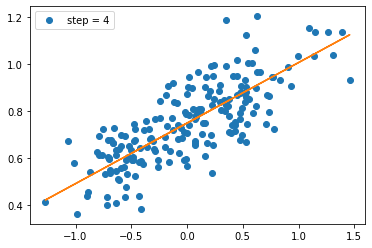


 y = [0.2428478] x + [0.7494029] 


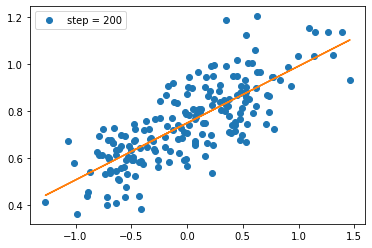


 y = [0.2428478] x + [0.7494029] 


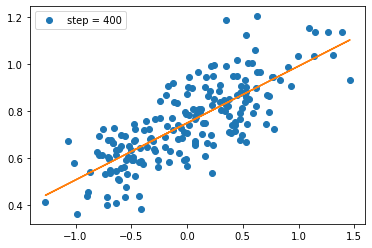


 y = [0.2428478] x + [0.7494029] 


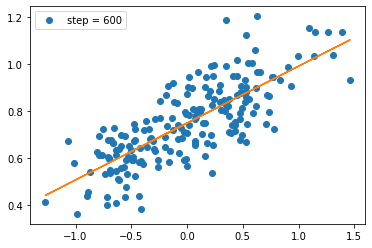


 y = [0.2428478] x + [0.7494029] 


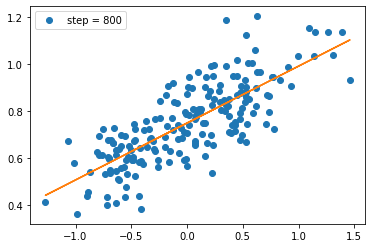


 y = [0.2428478] x + [0.7494029] 


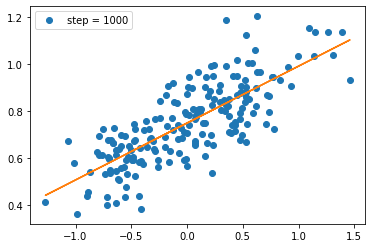


 y = [0.2428478] x + [0.7494029] 


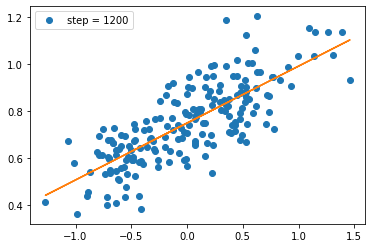


 y = [0.2428478] x + [0.7494029] 


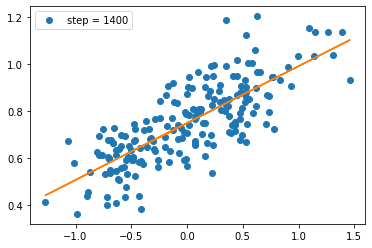


 y = [0.2428478] x + [0.7494029] 


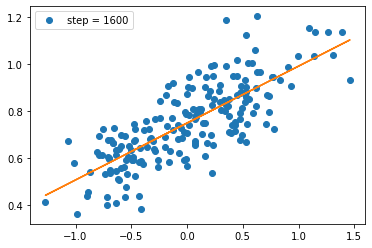


 y = [0.2428478] x + [0.7494029] 


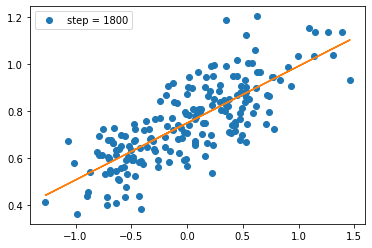


 y = [0.2428478] x + [0.7494029] 


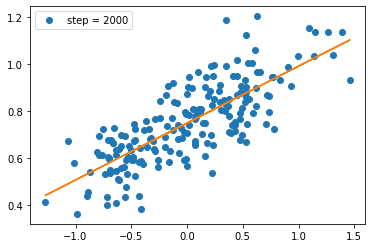

In [150]:
with tf.Session() as sess:
    sess.run(model)
    for step in range(0,2001):
        sess.run(train)
        if (step % 200) == 0 or step<5:
            print("\n y = {w} x + {b} ".format(w=sess.run(W), b=sess.run(B)))
            plt.plot(x_point,y_point,'o',label='step = {}'.format(step))
            plt.plot(x_point,sess.run(W)*x_point+sess.run(B))  # 선형회귀 그리기
            plt.legend(loc=2)
            plt.show()